In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("results.csv")

df = pd.DataFrame(data)

df_lima=df[df['city'] == 'Lima']
df_lima.head()

,year,city,city_temp,global_temp
33646,1881,Lima,15.75,8.27
33647,1882,Lima,15.88,8.13
33648,1883,Lima,16.18,7.98
33649,1884,Lima,16.14,7.77
33650,1886,Lima,15.81,7.95


In [11]:
ma_window = 10

df_lima['localMA'] = df_lima.iloc[:, 2].rolling(window=ma_window).mean()
df_lima['globalMA'] = df_lima.iloc[:, 3].rolling(window=ma_window).mean()

df_lima = df_lima.dropna()# remove null values
df_lima.tail()

,year,city,city_temp,global_temp,localMA,globalMA
33769,2009,Lima,17.40,9.51,17.211,9.493
33770,2010,Lima,16.97,9.70,17.206,9.543
33771,2011,Lima,17.03,9.52,17.214,9.554
33772,2012,Lima,17.68,9.51,17.238,9.548
33773,2013,Lima,17.00,9.61,17.202,9.556


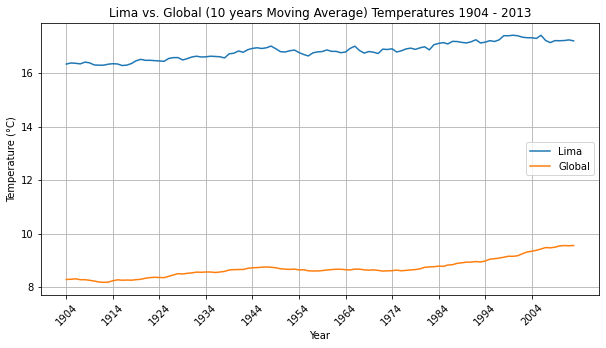

In [20]:
city = 'Lima'

start = int(df_lima.min(axis=0)['year'])
end = int(df_lima.max(axis=0)['year'])

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(df_lima['year'], df_lima['localMA'], label=city)

# plt.plot(df['year'],p1(df['year']),"r--")
# plt.plot(df['year'],p2(df['year']),"r--")

plt.plot(df_lima['year'], df_lima['globalMA'], label='Global')
plt.legend(loc=5)
plt.title(
    f"{city} vs. Global ({ma_window} years "
    f"Moving Average) Temperatures {start} - {end}"
)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.xticks(np.arange(start, end, ma_window))
plt.show()